<a href="https://colab.research.google.com/github/Jvargas442/Ciencia-de-datos/blob/main/Taller_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solución del taller introducción de EDA

In [ ]:
!pip install statsmodels

In [ ]:
!pip install wquantiles

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('titanic-train.csv')

In [10]:
print(df.info())
print(df.describe())
print(df.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

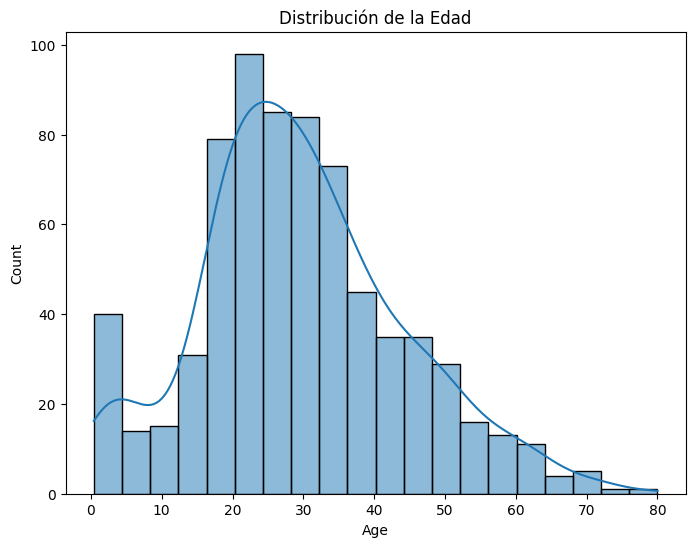

In [12]:
# Histograma de la edad
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribución de la Edad')
plt.show()

Del grafico, se puede analizar que la mayor cantidad de pasajeros tenua una edad entre 20 y 30 años. Ademas, tambien una gran cantidad de niños menores a 6 años.

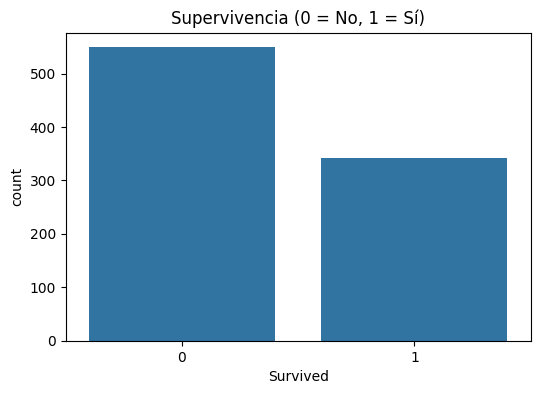

In [13]:
# Gráfico de barras de la supervivencia
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Supervivencia (0 = No, 1 = Sí)')
plt.show()

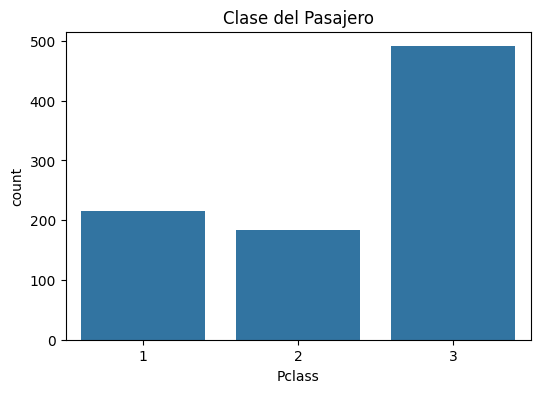

In [14]:
# Gráfico de barras de la clase del pasajero
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df)
plt.title('Clase del Pasajero')
plt.show()

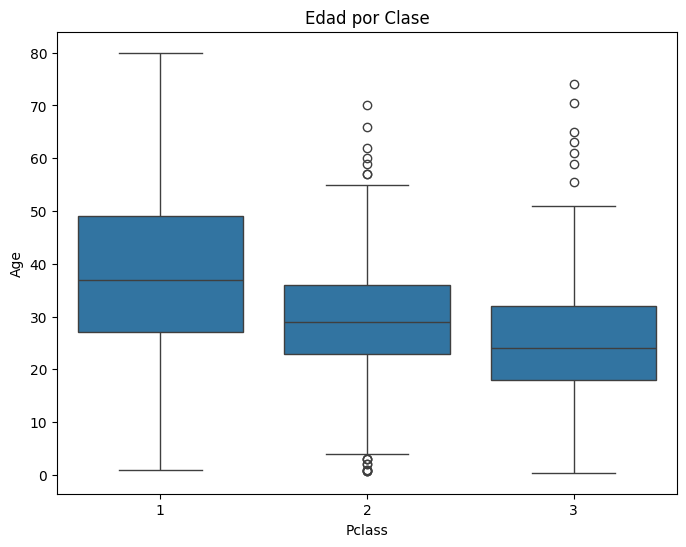

In [15]:
# Boxplot de la edad por clase
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Edad por Clase')
plt.show()


In [17]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
df['Age'] = df['Age'].fillna(0).astype(int)

print(df['Survived'].dtype)
print(df['Pclass'].dtype)

if df['Survived'].dtype != 'int64':
    df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce').fillna(0).astype(int)
if df['Pclass'].dtype != 'int64':
    df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce').fillna(0).astype(int)

print(df.info())


int64
int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB
None


Cómo podemos llenar los datos nulos?
Eliminación, simplemente eliminar las filas o columnas que contienen valores nulos.
valores estadísticos,Reemplazar los valores nulos con la media, mediana o moda de la columna.


Los datos disponibles son suficientes para generar un modelo mínimo viable?